In [88]:
#importing all the module which is required for the analysis
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import sklearn 
import imblearn

In [89]:
#now loading the given dataset by using read_csv() built in function of pandas libraray
#and converting dataset into df object
df=pd.read_csv('data/Automobile_data.csv')
df.head()


,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


price is the output whose dtypes is contineous numeric datatype value so thats why we r using linear regression algorithm for this given dataste mei

In [90]:
df.shape

(205, 15)

In [91]:
#to show all the information about dataset like nulls,no of column,memory consumeby dataset
#as well dtype of columns achieve by using info() built in method of pandas library!!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [92]:
#to show the statistical and mathematical summary of numeric column present in df object 
#achieve by using describe() built in method of pandas library
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


# Now performing EDA on this given dataset

# 1. checking for duplicate records exist or not in df object 

In [93]:
#checking for duplicate recorods present in df object or not
df.duplicated(keep=False).sum()

#if there duplicate records then dropping those records from df object
df.drop_duplicates(subset=df.columns,inplace=True,ignore_index=True)

# 2.checking for null value exist or not in df object

In [94]:
#checking for null
df.isnull().sum()
#below result showing no null value present in this given dataset mei

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [95]:
#now cross checking the null value present or not in given dataset 
#by finding out each column dtypes and comparing with those column record dtype if same then no null exist in df object

#checking the dtypes of each column by using dtypes as attribute of pandas library
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [96]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


#below result we can conclude that in normalized-losses mei record dtype is different with 
#normalized-losses column dtypes se....it happen bcoz some string special character present in it
#first we have to identify what type of string special character present 
#in this normalized-losses column
#identify and replace with nan value (np.nan)

#second then change the dtypes of normalized-losses column ka

#third check the % of null value

#then finally fill null value with mean/median/mode according to dtypes of column


#similarly we also identify horsepower column dtypes
#is different with record datatype which is present in it
#the above step repeat for this column also

In [97]:
#now checking normalized-losses column and horsepower column 
#what type of a string special character present in it
#sql query
#select normalized-losses from table_name(df)
count=0
for i,v in enumerate(df['normalized-losses']):
    if not v.isnumeric():
        print(i,v)
        count+=1
       
        
#if i want to see how many record showing '?' in normalized-losses column
#it achieve by using this:-
print('total ? present in normalized-losses are: ',count)

0 ?
1 ?
2 ?
5 ?
7 ?
9 ?
14 ?
15 ?
16 ?
17 ?
43 ?
44 ?
45 ?
46 ?
48 ?
49 ?
63 ?
66 ?
71 ?
73 ?
74 ?
75 ?
82 ?
83 ?
84 ?
109 ?
110 ?
113 ?
114 ?
124 ?
126 ?
127 ?
128 ?
129 ?
130 ?
131 ?
181 ?
189 ?
191 ?
192 ?
193 ?
total ? present in normalized-losses are:  41


#if i want to replace any string special character with null value se and also
#change the dtype of 'normalized-losses' column ka automatically 
#it achieve by using:- to_numeric(mention_col_name,errors='coerce') built in function of pandas library

In [98]:
df['normalized-losses']=pd.to_numeric(df['normalized-losses'],errors='coerce')

In [99]:
#again checking null value present in 'normalized-losses' column mei or not
df['normalized-losses'].isnull().sum()

41

In [100]:
#now checking dtypes of normalized-losses column se changed or not
df['normalized-losses'].dtypes

dtype('float64')

In [101]:
#now filling the null value which is present in normalized-losses column
#by mean/median depending dtype of the column
mean=df['normalized-losses'].mean()
mean

122.0

In [102]:
df['normalized-losses'] = df['normalized-losses'].fillna(mean)

In [103]:
#now if i want to see statistical summary
df.describe()

,symboling,normalized-losses,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,31.681008,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,137.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


similarly checking for horsepower column what type of string special character present in it

In [104]:
count=0
for i,v in enumerate(df['horsepower']):
    if not v.isnumeric():
        print(i,v)
        count+=1
       
       
#if i want to see how many record showing '?' in horsepower column
#it achieve by using this:-

print('total ? present in horsepower are: ',count)

130 ?
131 ?
total ? present in horsepower are:  2


In [105]:
#now repacing the special character with null value and also changing the dtypes of column
#it achiev by using to_numeric(mentioned_column,errors='coerce') built in function
#this function replace all type of string special character
#of pandas library
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')

In [106]:
#checking dtypes
df['horsepower'].dtypes

dtype('float64')

In [107]:
df['horsepower'].isnull().sum()

2

In [108]:
med=df['horsepower'].mean()
med

104.25615763546799

In [109]:
#filling the null value
df['horsepower'] = df['horsepower'].fillna(med)

In [110]:
df['horsepower'].isna().sum()

0

In [111]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,104.256158,25.219512,30.751220,13227.478049
std,1.245307,31.681008,2.145204,2.443522,41.642693,39.519211,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.100000,52.000000,97.000000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,65.500000,54.100000,120.000000,95.000000,24.000000,30.000000,10345.000000
75%,2.000000,137.000000,66.900000,55.500000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


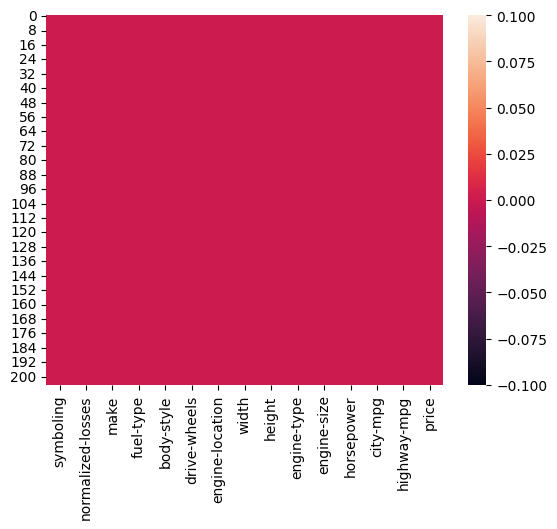

In [112]:
#again checking 
#if i want to visualize the null value present or not in given dataset mei
#it achive by using heatmap() built in function of seaborn libraray
sb.heatmap(df.isnull())
plt.show()

# 3.checking for outliers exist or not in df object

In [113]:
#outliers:- means we r measuring the dispersion of datapoint which is far way from upper and lower whisker those
#datapoint refered as outliers 

In [114]:
#to VISUALIZE THE OUTLIERS:--We are using boxplot() graph of seaborn library
#boxplot generally we used to measure the dispersion of data....and it is suitable for contineous 
#numeric datatype column or we can measure dispersion of datapoint by using by using conventional method
#(means finding out firstquantile and third quantile iqr,lw and uw & condition)

# visualising the outliers datapoint

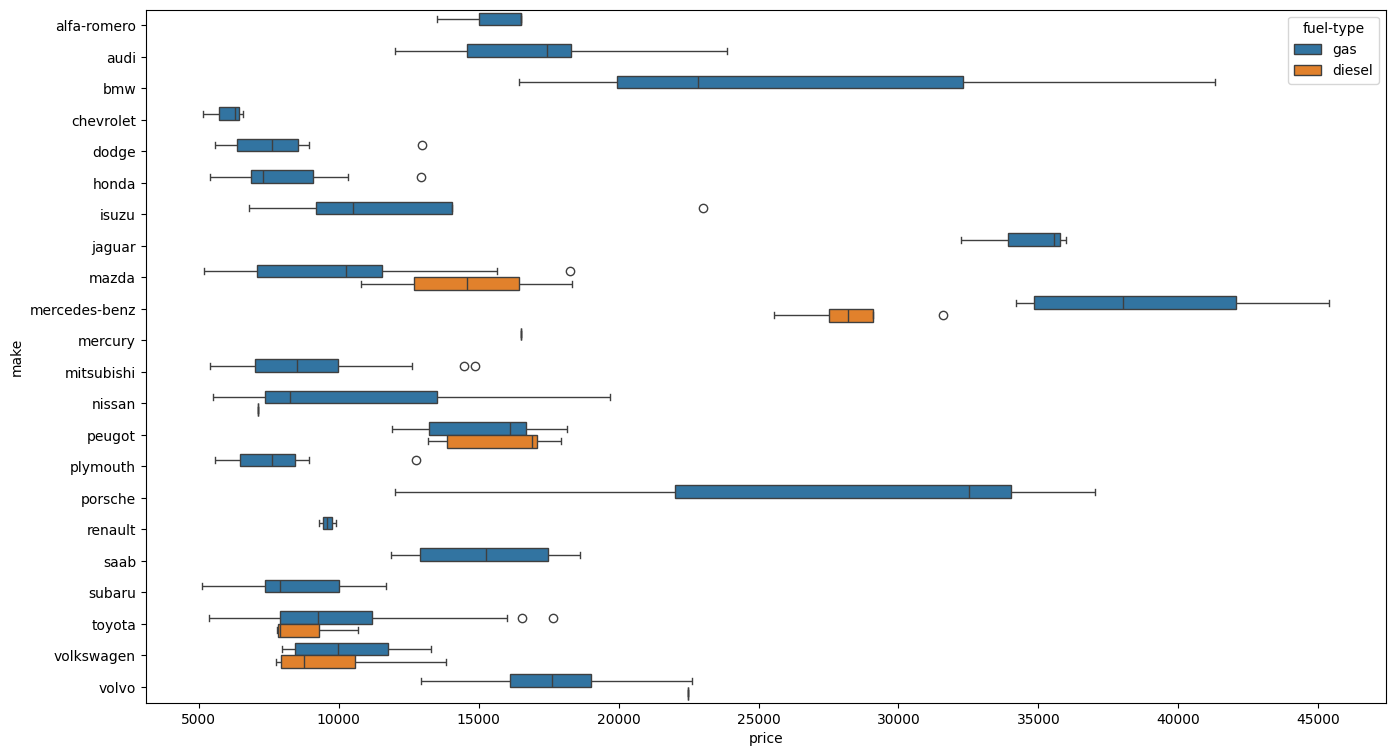

In [115]:
plt.figure(figsize=(16,9))
sb.boxplot(data=df,x='price',y='make',hue='fuel-type')
plt.show()
#note:- price is depend upon many features or input variable pe
#so we can findout outlier by using input variable features

# using conventional technique to find outliers

In [116]:
#the outliers can also be estimated by using convention way of techniques
#first quantile
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)

In [117]:
#estimating the inter quantile range
iqr=q3-q1
iqr

8712.0

In [118]:
#estimating lower whisker
lw=q1-1.5*iqr
lw

-5280.0

In [119]:
#estimating the upper whisker point
uw=q3+1.5*iqr
uw

29568.0

In [120]:
#now showing outlier in given dataste by using this condition
df[(lw>df['price'])|(uw<df['price'])]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
15,0,122.0,bmw,gas,sedan,rwd,front,66.9,55.7,ohc,209,182.0,16,22,30760
16,0,122.0,bmw,gas,sedan,rwd,front,67.9,53.7,ohc,209,182.0,16,22,41315
17,0,122.0,bmw,gas,sedan,rwd,front,70.9,56.3,ohc,209,182.0,15,20,36880
47,0,145.0,jaguar,gas,sedan,rwd,front,69.6,52.8,dohc,258,176.0,15,19,32250
48,0,122.0,jaguar,gas,sedan,rwd,front,69.6,52.8,dohc,258,176.0,15,19,35550
49,0,122.0,jaguar,gas,sedan,rwd,front,70.6,47.8,ohcv,326,262.0,13,17,36000
70,-1,93.0,mercedes-benz,diesel,sedan,rwd,front,71.7,56.3,ohc,183,123.0,22,25,31600
71,-1,122.0,mercedes-benz,gas,sedan,rwd,front,71.7,56.5,ohcv,234,155.0,16,18,34184
72,3,142.0,mercedes-benz,gas,convertible,rwd,front,70.5,50.8,ohcv,234,155.0,16,18,35056
73,0,122.0,mercedes-benz,gas,sedan,rwd,front,71.7,56.7,ohcv,308,184.0,14,16,40960


In [121]:
#show me total records showing outlier
len(df[(lw>df['price'])|(uw<df['price'])])

14

In [122]:
#show me the index of those record are outlier 
idx = df[(lw>df['price'])|(uw<df['price'])].index
idx

Index([15, 16, 17, 47, 48, 49, 70, 71, 72, 73, 74, 126, 127, 128], dtype='int64')

In [123]:
#show me the shape of outlier
df[(lw>df['price'])|(uw<df['price'])].shape

(14, 15)

In [124]:
#now dropping those outliers records from df object
df = df.drop(idx,axis=0).reset_index(drop=True)

In [125]:
df.shape

(191, 15)

In [126]:
#bifurgating the df object according to the dtype of column
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

# 4) finding the skewness present or not in df object if exist then we reduce the skewness by using transformation


# skewness can be found out by using normally distributed curve (nd curve)

nd curve is frequency curve 
generally suitable for cndt column value ke liye
skewness directly proportional outlier is directly error in model
condition for skewness:- if mean=median=mode means no skewness present 
mean>median>mode means +ve skewness present in the column (graph distribution max seen on rt side)
mean<median<mode means -ve skewness present in this column(graph distribution max seen on lft side)
#in order to minimize the skewness
following condition must be satisfy:-
1)if any negative value prsent in the column we cannot reduce the minimize the skewness of column
2)we will minimize the skewness of those column whose correlation btn input and output variable
is bad correlated means correlation <+-0.5 hoga then only we will minimize the skewness of column


column:symboling
skewness:0.1585952745626031


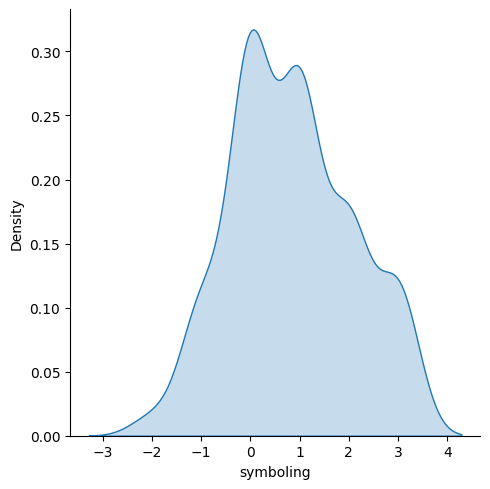

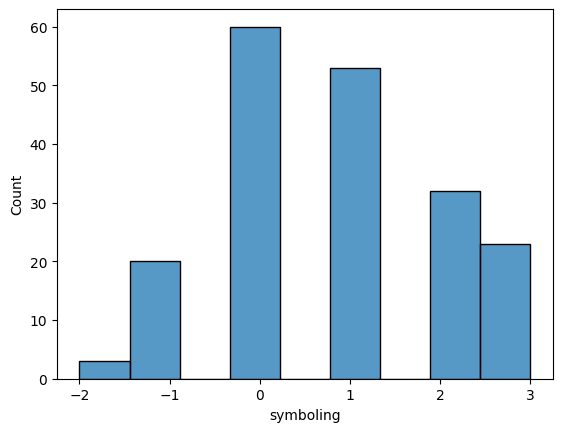


column:normalized-losses
skewness:0.8438156685361347


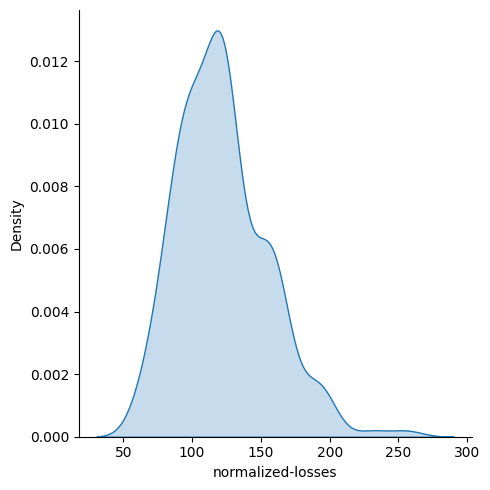

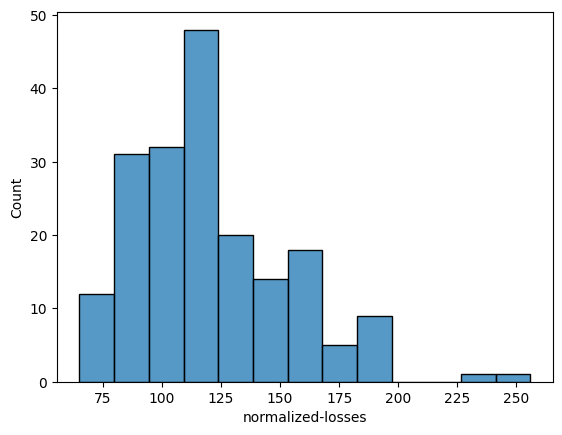


column:width
skewness:0.8148863949164729


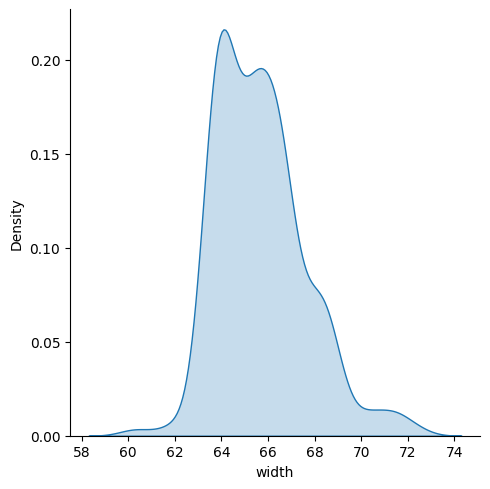

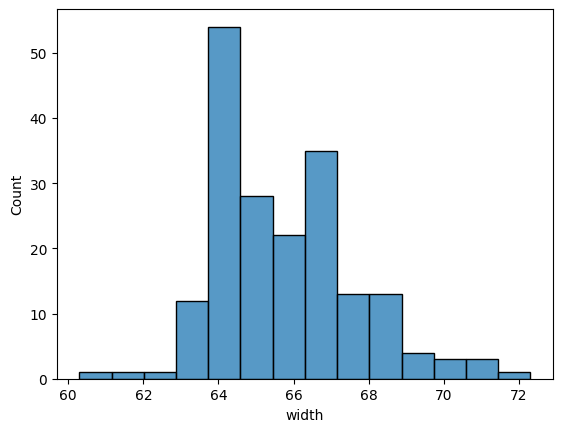


column:height
skewness:0.11489353994073966


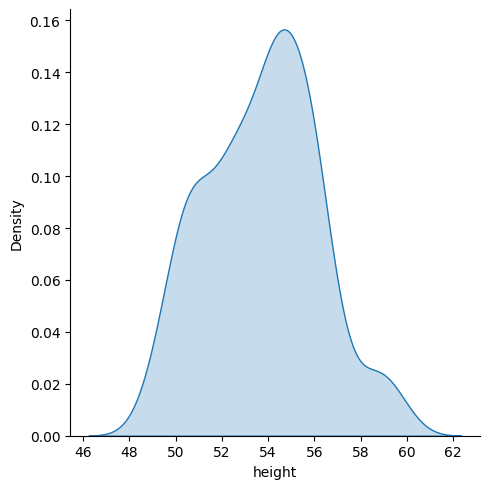

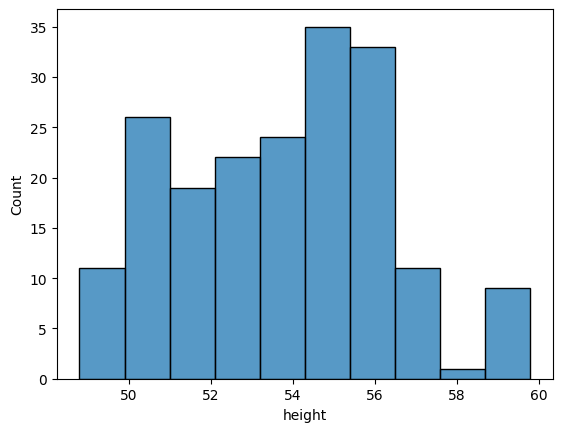


column:engine-size
skewness:0.740096109029573


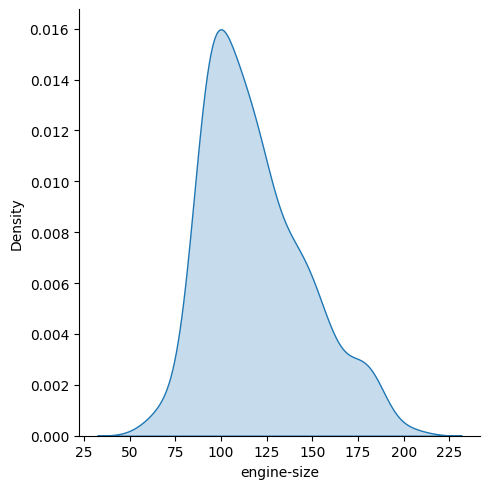

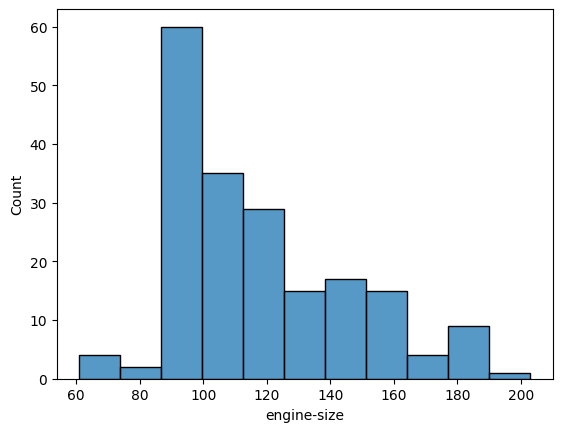


column:horsepower
skewness:1.538468416950328


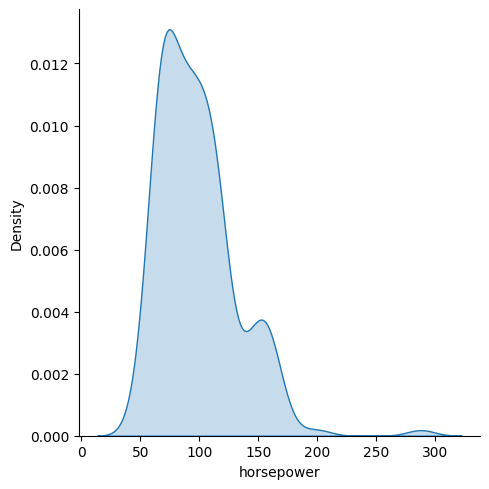

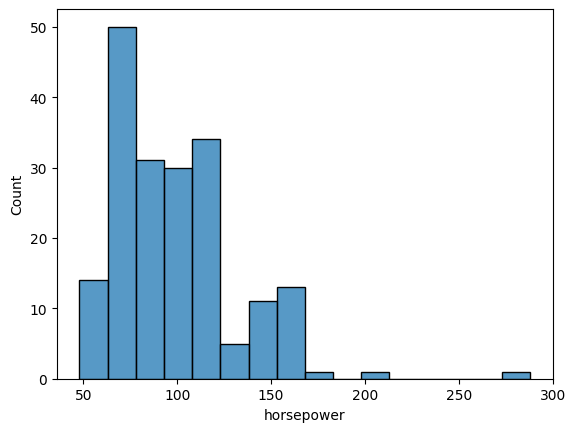


column:city-mpg
skewness:0.7719331298717839


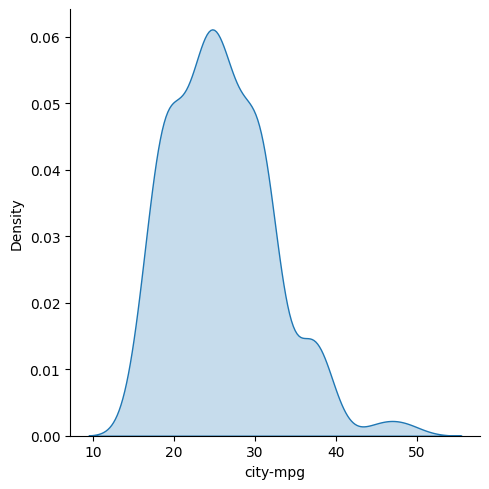

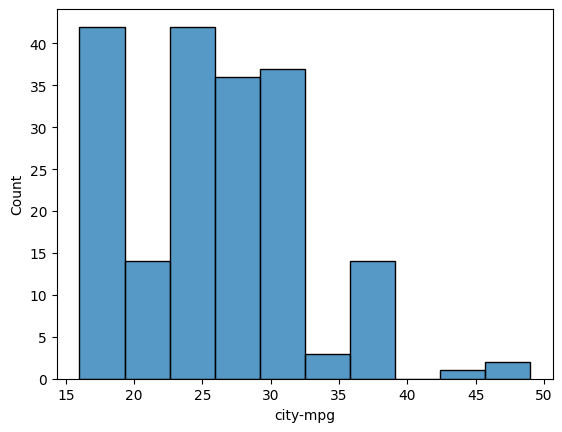


column:highway-mpg
skewness:0.7364281740531796


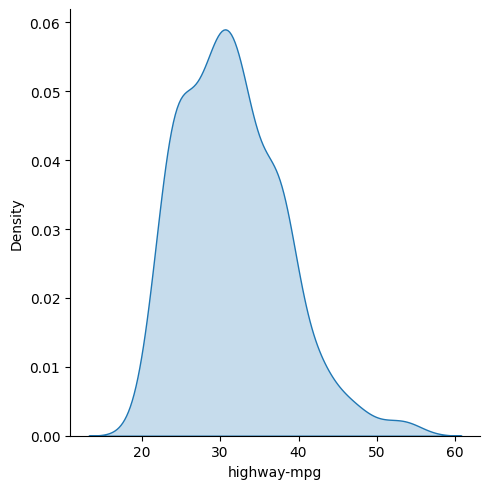

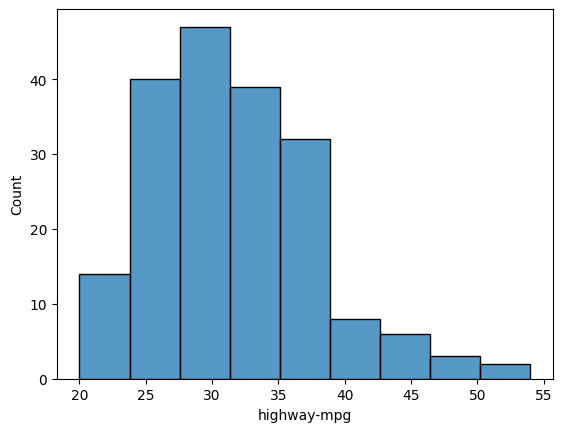


column:price
skewness:1.0176661887138065


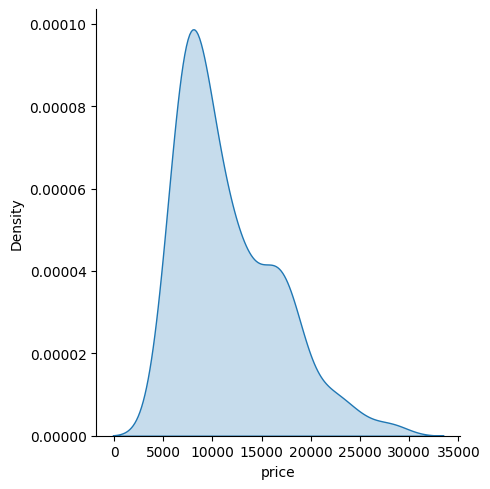

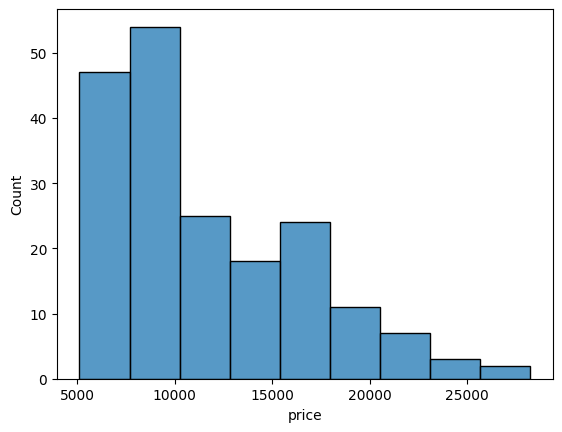

In [127]:
#nd curve can be plot by using histplot or distplot() built in function of seaborn library
x=df_num.columns
for i,v in enumerate(x):
    skew=df_num[v].skew()
    print(f'column:{v}\nskewness:{skew}')
    #ploting the nd curve
    sb.displot(data=df_num[v], kind='kde', fill=True)  # Use kind='kde' for density curve
    plt.show()
    sb.histplot(data=df_num,x=v)
    plt.show()
    print()

#now we will try minimize the skewness if and only if condition is satisfy
following condition must be satisfy:-
1)if any negative value prsent in the column we cannot reduce the minimize the skewness of column
2)we will minimize the skewness of those column whose correlation btn input and output variable
is bad correlated means correlation <+-0.5 hoga then only we will minimize the skewness of column

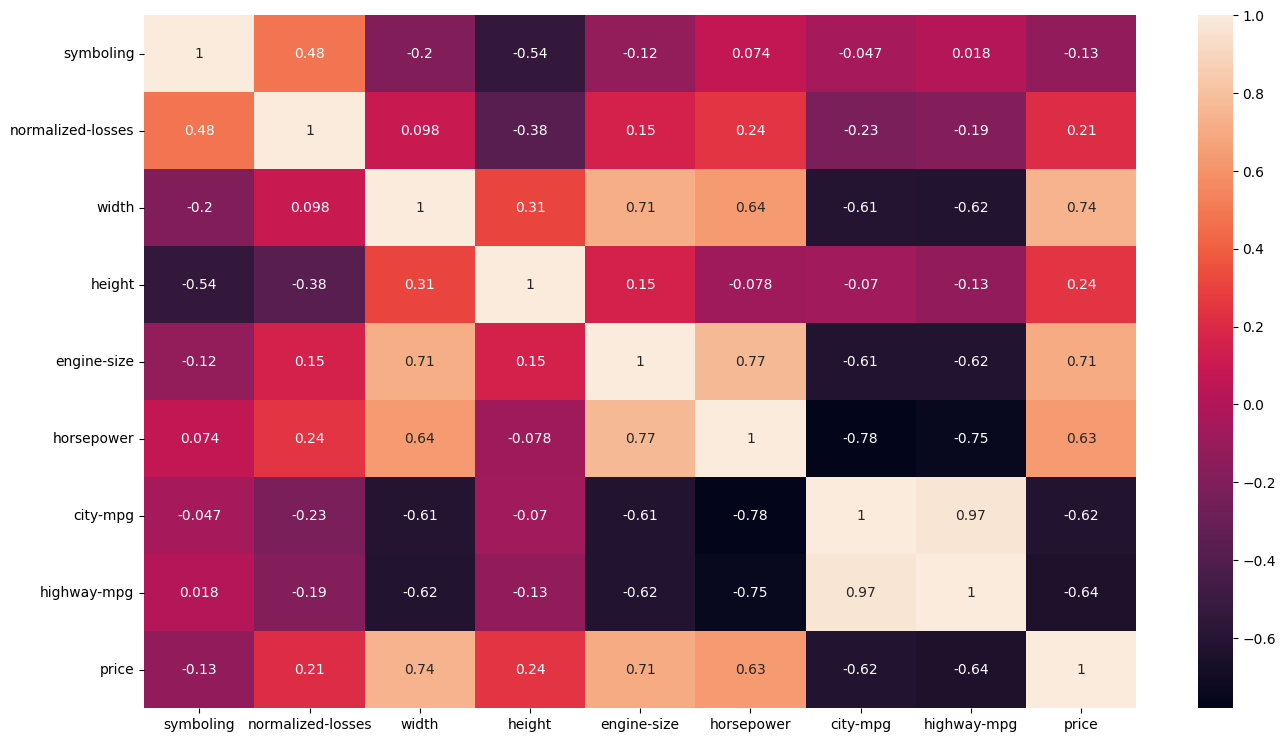

In [128]:
#so finding the correlation btn input and output by using heatmap() of seaborn library
plt.figure(figsize=(16,9))
sb.heatmap(df_num.corr(),annot=True)
plt.show()

In [129]:
#above result we can say that symboling normalized-losses height column showing bad correlation
df_num.columns

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [130]:
#checking any negative value present or not above columns
x=['symboling', 'normalized-losses', 'height']
count=0
for i in x:
        for index,v in enumerate(df_num[i]):
            if v<0:
                print(i,v,index)
                count=count+1
                break

symboling -1 25


In [131]:
#above result we can clearly see symboling cndt column showing negative record so we will not gonna
#the skewness by using transformation
#now we will minimize the skewness of normalized-losses and height column
#by using np.log() transformation 
df['normalized-losses']=np.log(df['normalized-losses'])
#again checking the skewness of normalized-losses column ka
df['normalized-losses'].skew()

0.061165948237047095

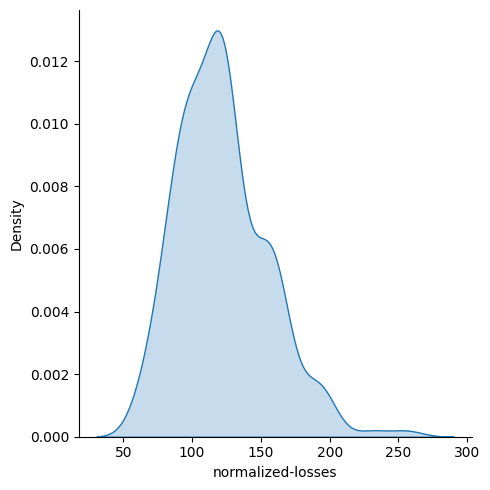

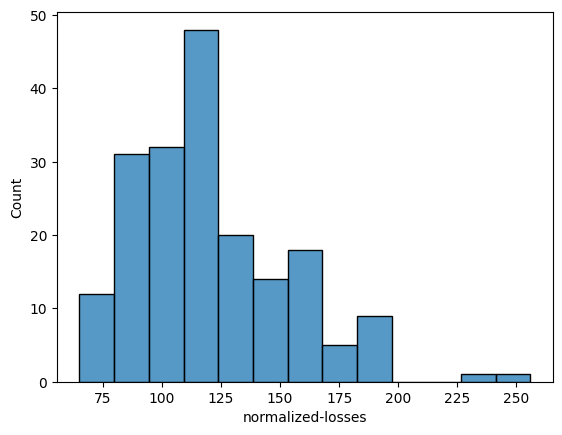

In [132]:
#ploting the nd curve
sb.displot(x=df_num['normalized-losses'],kind='kde',fill = True)
plt.show()
sb.histplot(data=df_num,x='normalized-losses')
plt.show()

In [133]:
#lly we will try to minimize the skewness of height column ka
df['height']=np.log(df['height'])
df['height'].skew()

0.013644222154695528

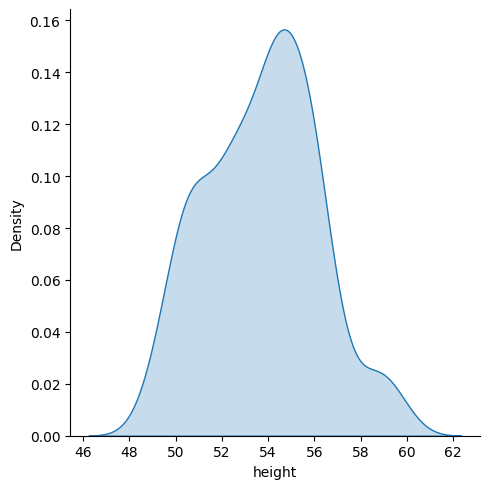

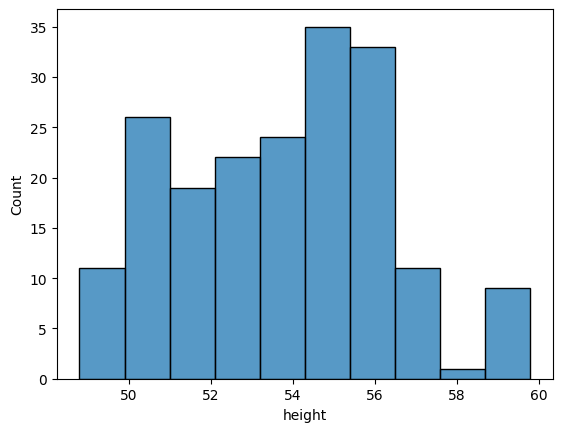

In [134]:
#ploting the nd curve
sb.displot(x=df_num['height'],kind='kde',fill=True)
plt.show()
sb.histplot(data=df_num,x='height')
plt.show()

In [135]:
#after cleaning the dataset or performing EDA saving the dataset for performing the model training
df.to_csv('cleaned_automobile.csv',index=False)